# Imports

In [1]:
import time

import numpy    as np
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import linear_model    # LogisticRegression
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__)

Pandas   1.3.0
Sklearn  0.24.2


# Load Data

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [3]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [29]:
df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
5,0005_01,Earth,0,F/0/P,PSO J318.5-22,44,0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1
6,0006_01,Earth,0,F/2/S,TRAPPIST-1e,26,0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1
8,0007_01,Earth,0,F/3/S,TRAPPIST-1e,35,0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1
9,0008_01,Europa,1,B/1/P,55 Cancri e,14,0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1
11,0008_03,Europa,0,B/1/P,55 Cancri e,45,0,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,1


# Check Data

In [5]:
df_train.isnull().sum()/len(df_train)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [6]:
df_test.isnull().sum()/len(df_test)

PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64

In [7]:
df_train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
df_train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

# Plotting

<AxesSubplot:title={'center':'Count (target)'}>

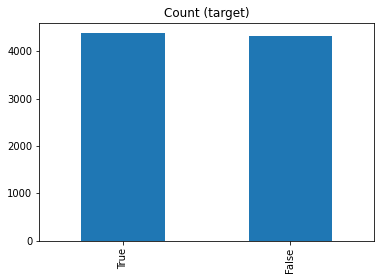

In [9]:
df_train['Transported'].value_counts().plot(kind='bar', title='Count (target)')

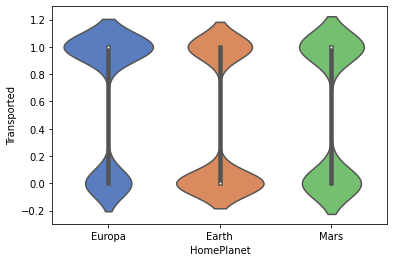

In [10]:
ax = sns.violinplot(x="HomePlanet", y="Transported",
                    data=df_train, palette="muted", split=True)

# PEOPLE FROM EUROPA LIVED MORE, EARTH DIED AND MARS WAS EQUAL

# Feature Extraction

In [11]:
'''
HomePlanet - One hot encode
CryoSleep - Turn to 0 and 1
Destination - One hot encode
VIP - Turn to 0 and 1

Cabin - Create new column based on if port or starboard side

Turn all Numbers into ints
'''

'\nHomePlanet - One hot encode\nCryoSleep - Turn to 0 and 1\nDestination - One hot encode\nVIP - Turn to 0 and 1\n\nCabin - Create new column based on if port or starboard side\n\nTurn all Numbers into ints\n'

In [12]:
# Dropping Null Rows - LOOSING 2000 ROWS!
df_train = df_train.dropna()

In [13]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
# Turn all booleans to 1 or 0
boolean_to_binary = {True : 1, False : 0}

df_train['CryoSleep'] = df_train['CryoSleep'].map(boolean_to_binary)
df_test['CryoSleep'] = df_test['CryoSleep'].map(boolean_to_binary)

df_train['VIP'] = df_train['VIP'].map(boolean_to_binary)
df_test['VIP'] = df_test['VIP'].map(boolean_to_binary)

df_train['Transported'] = df_train['Transported'].map(boolean_to_binary)

In [15]:
# Make sure all cols are ints
cols = ['CryoSleep', 'Age', 'VIP']

df_train[cols] = df_train[cols].astype("Int64", errors='ignore')

In [30]:
df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
5,0005_01,Earth,0,F/0/P,PSO J318.5-22,44,0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1
6,0006_01,Earth,0,F/2/S,TRAPPIST-1e,26,0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1
8,0007_01,Earth,0,F/3/S,TRAPPIST-1e,35,0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1
9,0008_01,Europa,1,B/1/P,55 Cancri e,14,0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1
11,0008_03,Europa,0,B/1/P,55 Cancri e,45,0,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,1


# Drop Features

In [17]:
'''
Drop:

Name
RoomService
FoodCourt
ShoppingMall
Spa
VR Deck

'''

'\nDrop:\n\nName\nRoomService\nFoodCourt\nShoppingMall\nSpa\nVR Deck\n\n'

In [18]:
x = df_train.drop(columns=['Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'PassengerId'])
y = df_train['Transported']

x_test = df_test.drop(columns=['Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerId'])

In [19]:
x.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,Europa,0,B/0/P,TRAPPIST-1e,39,0
1,Earth,0,F/0/S,TRAPPIST-1e,24,0
2,Europa,0,A/0/S,TRAPPIST-1e,58,1
3,Europa,0,A/0/S,TRAPPIST-1e,33,0
4,Earth,0,F/1/S,TRAPPIST-1e,16,0


In [20]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

# Prepro Pipeline

In [21]:
cat_vars = ['HomePlanet', 'Cabin', 'Destination', 'CryoSleep', 'VIP']
num_vars = ['Age']

In [22]:
# for tree models
num_4_treeModels = pipeline.Pipeline(steps=[
  ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=False))
])

cat_4_treeModels = pipeline.Pipeline(steps=[
  ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
  ('ordinal', preprocessing.OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_treeModels, num_vars),
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro

# for multiplicate models
num_4_multiModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('normalize', preprocessing.PowerTransformer()) 
])

cat_4_multiModels = pipeline.Pipeline(steps=[
  ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
  ('onehot', preprocessing.OneHotEncoder(handle_unknown="ignore"))
])

multi_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_multiModels, num_vars),
    ('cat', cat_4_multiModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

multi_prepro

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('normalize',
                                                  PowerTransformer())]),
                                 ['Age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['HomePlanet', 'Cabin', 'Destination',
                                  'CryoSleep', 'VIP'])])

# Model Prep

In [23]:
# tree models
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

# mulitplicate models
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model  import LogisticRegression
from sklearn.linear_model  import Ridge
from sklearn.linear_model  import Lasso

In [24]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(random_state=0),
  "Extra Trees":ExtraTreesClassifier(random_state=0),
  "Random Forest":RandomForestClassifier(random_state=0),
  "AdaBoost":AdaBoostClassifier(random_state=0),
  "Skl GBM":GradientBoostingClassifier(random_state=0),
  "Skl HistGBM":GradientBoostingClassifier(random_state=0),
  "XGBoost":XGBClassifier(random_state=0),
  "LightGBM":LGBMClassifier(random_state=0),
  "CatBoost":CatBoostClassifier(random_state=0)
}

tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}

multi_classifiers = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

multi_classifiers = {name: pipeline.make_pipeline(multi_prepro, model) for name, model in multi_classifiers.items()}

multi_classifiers["Lasso"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('normalize',
                                                                   PowerTransformer())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'Cabin',
                                                   'Destination', 'CryoSleep',
                                                   'VIP'])])),
                ('lasso', Lasso())])

# Validation

In [25]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=1
)

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

# Running Tree Models

In [26]:
# Checking if any value is infinite

ds = x_val.isin([np.inf, -np.inf])
print(ds)

      HomePlanet  CryoSleep  Cabin  Destination    Age    VIP
5823       False      False  False        False  False  False
5893       False      False  False        False  False  False
4617       False      False  False        False  False  False
4541       False      False  False        False  False  False
2411       False      False  False        False  False  False
...          ...        ...    ...          ...    ...    ...
18         False      False  False        False  False  False
6650       False      False  False        False  False  False
7635       False      False  False        False  False  False
8299       False      False  False        False  False  False
1925       False      False  False        False  False  False

[1322 rows x 6 columns]


In [27]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 5823 to 1925
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   1322 non-null   object
 1   CryoSleep    1322 non-null   Int64 
 2   Cabin        1322 non-null   object
 3   Destination  1322 non-null   object
 4   Age          1322 non-null   Int64 
 5   VIP          1322 non-null   Int64 
dtypes: Int64(3), object(3)
memory usage: 76.2+ KB


In [28]:
for model_name, model in tree_classifiers.items():
    start_time = time.time()
    model.fit(x_train,y_train)
    total_time = time.time() - start_time
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

ValueError: Cannot use constant strategy with non-numeric data:
could not convert string to float: 'Europa'

# Using best Model

In [ ]:
best_model = tree_classifiers['Skl GBM']
best_model.fit(x,y)

In [ ]:
test_preds = best_model.predict(x_test)

# _____________________________________
# _____________________________________

# OLD CODE

In [ ]:
# num_prepoccessing = pipeline.Pipeline(steps=[
#     ('impute', impute.SimpleImputer(strategy='mean', add_indicator=False)),
#     ('scaler', preprocessing.StandardScaler())
# ])
# cat_prepoccessing = pipeline.Pipeline(steps=[
#     ('impute', impute.SimpleImputer(strategy='constant', add_indicator=False)),
#     ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
# ])
# prepro = compose.ColumnTransformer(transformers=[
#     ('num', num_prepoccessing, num_vars),
#     ('str', cat_prepoccessing, cat_vars)
# ])

# prepro

In [ ]:
# x_train_prepro = prepro.fit_transform(x_train)
# x_val_prepro = prepro.transform(x_val)

# x_test_prepro = prepro.transform(x_test)

In [ ]:
# model = linear_model.LogisticRegression(max_iter=2000, random_state=1)
# model.fit(x_train_prepro, y_train)

# Model Pipeline

In [ ]:
# full_model = pipeline.Pipeline([('Preproccessing', prepro), ('Model', model)])
# full_model

In [ ]:
# y_pred = model.predict(x_test_prepro)

# print("Accuracy:\t", model.score(x_val_prepro, y_val)*100)